# This is the code we used to obtain results for the portfolios

### this shows the analysis of the resulte obtained by the volume, highest price, lowest price, closing bid, opening bid, and volume of the SPY index fund

In [1]:
import pandas as pd

In [2]:
# Read in the data
r = pd.read_csv('percentileonly.csv')

In [3]:
r

,Unnamed: 0,real,predict
0,0,266.00000,243.37538
1,1,269.59000,243.03535
2,2,273.03000,242.16507
3,3,273.10999,242.49774
4,4,271.39999,243.52605
...,...,...,...
720,720,367.23999,334.27322
721,721,367.57001,267.08760
722,722,369.00000,251.94379
723,723,372.17001,251.37062


In [4]:
# Running a regression to look in to the amount of variability that can be explained by this model

# > 90% R^2 is a good outcome

from statsmodels.formula.api import ols
model = ols('predict ~ real', r).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                predict   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     60.08
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           3.10e-14
Time:                        14:08:13   Log-Likelihood:                -3580.4
No. Observations:                 725   AIC:                             7165.
Df Residuals:                     723   BIC:                             7174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    185.9935     13.005     14.302      0.0

In [5]:
r = r.rename(columns = {'Unnamed: 0':'Trading Day'})

In [6]:
r

,Trading Day,real,predict
0,0,266.00000,243.37538
1,1,269.59000,243.03535
2,2,273.03000,242.16507
3,3,273.10999,242.49774
4,4,271.39999,243.52605
...,...,...,...
720,720,367.23999,334.27322
721,721,367.57001,267.08760
722,722,369.00000,251.94379
723,723,372.17001,251.37062


### Creating columns for the implied returns based on the predicted prices. Then we get weather we predict weather the price goes up or down and which way it actually went.

In [7]:
r['real returns'] = r['real'].pct_change()
r['predicted returns'] = r['predict'].pct_change()

In [8]:
r['realdirection'] = r['real returns'] >= 0
r['predicteddirection'] = r['predicted returns'] >= 0

In [9]:
(r[r['realdirection'] == r['predicteddirection']])

,Trading Day,real,predict,real returns,predicted returns,realdirection,predicteddirection
0,0,266.00000,243.37538,NaN,NaN,False,False
3,3,273.10999,242.49774,0.000293,0.001374,True,True
6,6,270.39999,247.35309,0.001296,0.009297,True,True
7,7,274.70999,250.67175,0.015939,0.013417,True,True
8,8,277.89999,255.76160,0.011612,0.020305,True,True
...,...,...,...,...,...,...,...
714,714,364.66000,335.24893,-0.004477,-0.000157,False,False
717,717,372.23999,334.95276,0.005592,0.000072,True,True
719,719,367.85999,335.31476,-0.003575,-0.006393,False,False
720,720,367.23999,334.27322,-0.001685,-0.003106,False,False


In [10]:
# Changing True False to binary

r['realdirection'] = r['realdirection'] * 1
r['predicteddirection'] = r['predicteddirection'] * 1

In [11]:
r['portfolio'] = r['real returns'] * r['predicteddirection']

In [12]:
r = r.dropna()

### This graph shows the decrease in volitility in the portoflio reutrns and the real returns

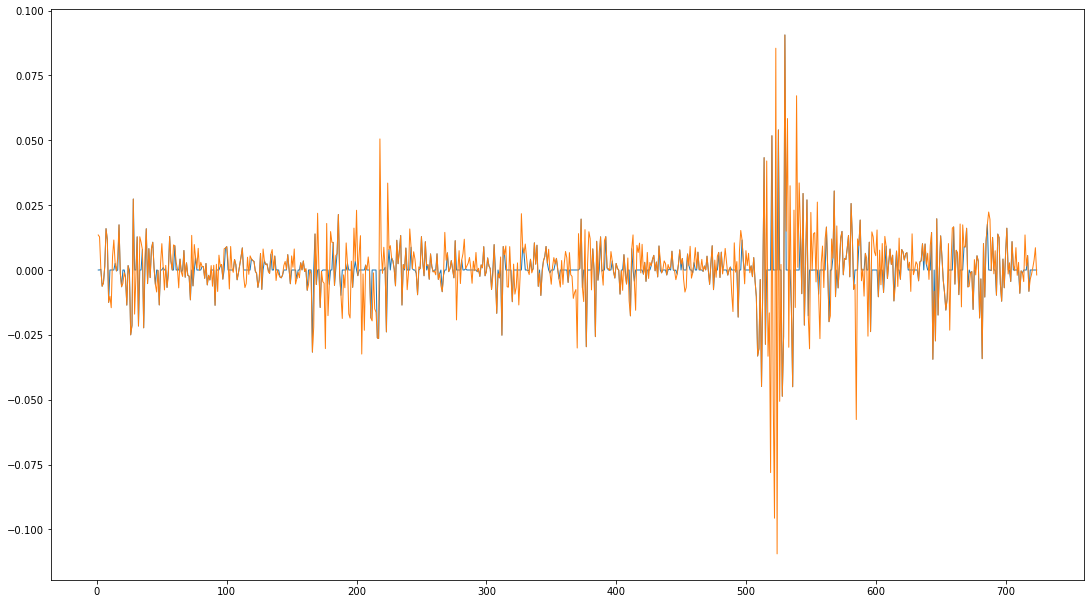

In [13]:
import matplotlib.pyplot as plt
x = r['Trading Day']
y = r[['portfolio','real returns']]
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=1.0)
fig.set_size_inches(18.5, 10.5)
plt.show()

### Calculationg sharpe ratios

In [14]:
print('sharpe for the portfolio', (r['portfolio'].mean()/r['portfolio'].std()) * (252 ** (1/2)))
print('Sharpe for the market', (r['real returns'].mean()/r['real returns'].std()) * (252 ** (1/2)))

sharpe for the portfolio 0.3346609213892962
Sharpe for the market 0.6208085107422285


### Estimating returns on the two portfolios

In [15]:
market = []
x = 100
for i in list(r['real returns'] + 1):
    x = x * i
    market.append(x)
print('returns for $100 in the market: ', x )

portfolio = []
x = 100
for i in list(r['portfolio'] + 1):
    x = x * i
    portfolio.append(x)
print('returns for $100 in the portfolio: ', x )

returns for $100 in the market:  139.64661278195504
returns for $100 in the portfolio:  111.66879415471558


In [16]:
g = pd.DataFrame()
g['portfolio'] = portfolio
g['market'] = market

## Plot of the two portfolios preformance.

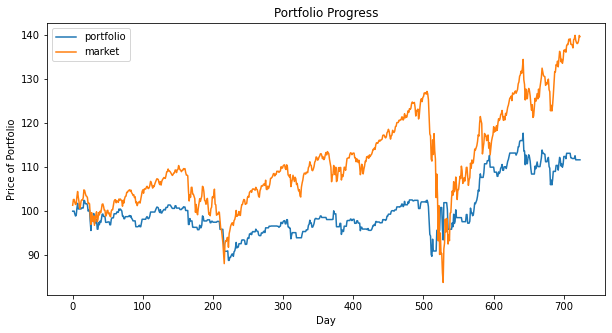

In [17]:
g.plot(figsize= (10,5))
plt.legend(loc = 'best')
plt.title("Portfolio Progress")
plt.xlabel("Day")
plt.ylabel("Price of Portfolio")
plt.show()